# $\LaTeX$ commands
$\newcommand{\SHA}{\text{SHA256}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Z}{\mathbb{Z}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\Q}{\mathbb{Q}}
$


In [3]:
from numpy.random import seed, uniform, randint, exponential
import argparse
import math
import hashlib, binascii
import time
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy.stats import binom

# Bitcoin Lab 
In this Lab, we are going to study some basic properties  of elementary distributions. As a motivating example, we are going to examine a simplified version of the cryptocurrency Bitcoin.

# What is Bitcion?
Bitcoin a digital currency initially introduced by ``Satoshi Nakamoto" in early 2008. While Bitcoin is incredibly fascinating in regards to philosophy and implementation, this lab will focus on how Bitcoin is \textit{mined}. 

Bitcoin is similar to objects with ``intrinsic" value which are
obtained through physical labor such as
gold. While there are many reasons why gold has become socially
accepted as an object instilled with intrinsic value, it can be
partially attributed to its scarcity and traditional difficulty of
acquisition. For starters, if we were to acquire all of the gold in the
world, and melt it down, it would fit in about $3.5$ Olympic regulation
sized pools. Second, the process of mining gold is costly and
physically difficult. You need to smack a rock with a pickax until you
strike gold. Further, even if you mine for gold your whole life, there is no guarantee that you will ever actually mine any!

In order to simulate this level of exertion, Bitcoin bases
its algorithm for mining off of a $\textit{proof of work}$ scheme, where
instead of physically exerting oneself as in the case of gold mining,
Bitcoin miners compute something that requires a considerable investment
in the way of hardware, power, and time.
The actual proof of work scheme involves finding
an input to the SHA-256 hash function that has $n$
leading zeros.  (So, the miner needs to find some $x$ such that
$y=$SHA256$(x)$ where the first $n$ bits of $y$ are zero.) As a remark, there are restrictions on the input. 


Bitcoin makes use of a data structure called the Blockchain, which acts as a public
ledger of all transactions. You can imagine it as a linked list of blocks.
Each block contains a set of transactions.
In order to mine a new Bitcoin, a miner needs to
first propose a new block $B_j$ (which includes a set of transactions
to be confirmed on the blockchain; we omit details but you can
learn more about this online!). Then, the miner needs to $\textit{confirm}$ this
block $B_j$ by finding a nonce $r_j$ such that $y=\SHA(B_{j-1}||B_j ||r_j)$ and the
first $n$ bits of $y$ are zero.  $B_{j-1}$ is the previous block
in the blockchain.  The nonce (a value that never repeats, usually a
value that is chosen at random) $r_j$ is used to confirm that the
block $B_j$ comes immediately after block $B_{j-1}$ on the blockchain.
Miners compete to find a valid nonce $r_j$; the first miner to find
and publish such a nonce $r_j$ to the other miners is rewarded with  bitcoin(s).


# Bernoulli
We begin the discussion of distributions with one of the most elementary and important: the Bernoulli distribution.  Many problems in probability theory involve independently repeating random experiments and observing whether or not a specific event occurs. That is, Bernoulli random variables arise naturally in probability theory as indicators of events.  As a motivating example, suppose out of all possible outcomes $\Omega$, we define $A\subset \Omega$ to be a success and $\Omega \setminus A$ to be a failure . Such an experiment is modeled by a random variable $X$ with Bernoulli distribution written $X\sim Bernouli(p)$ with outcomes
 $$X= \begin{cases} 1 & \text{if } A\text{ occurs,}  \\
0 & A \text{ does not occur.}
\end{cases}$$
\begin{align*}
 \Pr[X=1]&=p\\
  \Pr[X=0]&=1-p\\
  \Pr[X=k]&=0 \qquad \forall k\notin\{0,1\}
\end{align*}

Repeated trials of a random experiment are called Bernoulli trials if the following conditions are met.
- The trials are independent of each other.
- The result of each trial is either a success or a failure
- The probability of success remains unchanged from trial to trial

 Recall that independence of random variables $X,Y$ is defined as $$\Pr[X|Y]=\Pr[X]$$
  and similarly, $$\Pr[Y|X]=\Pr[Y]$$
  
  
  Intuitively, this means that observing the outcome of one event in no way influences the outcome of future outcomes. For example, if I flip a fair coin 100 times and get all heads, I am still equally as likely to get heads or tails on the 101st flip. Each coin flip can be thought of as an independent Bernoulli trial with probability of success $p=1/2$.
More generally, the most elementary example of a Bernoulli random variable, is flipping a $p$-biased coin, and having the random variable take on $1$ (success) if the coin comes up heads and $0$ (failure) otherwise. 

It is important to keep in mind why it is even worth studying distributions, aside from the fact that they are interesting in their own right. In particular, we, as computer scientists often wish model the outcome of uncertain events.  Lets look at a single attempt at mining a Bitcoin. To model this process, we make a few assumptions.

First, lets assume that outputs of the hash function are indistinguishible from what is called a \textit{Random Oracle}.  That is, on input $x\in \{0,1\}^*$, the output value $\SHA(x)$ is uniformly chosen from $\{0,1\}^{256}$, which is the same as if you flipped 256 fair independent coins and recorded the output. Further, if you hash the same $x$, you get the same value both times. Hence, it behaves like an oracle that on a request randomly chooses an output, and then remembers it for future requests. 

Second, assume that each miner randomly chooses a value for the nonce $r_j$, hashes it along with $B_j$ and $B_{j_1}$, and checks if the output has $\rho$ leading zeros. If it doesn't, it chooses a fresh random $r_j$ and tries again. As a remark, it is not this simple in reality. 

Third, lets assume that the required number of leading zeros is denoted  $\rho\in \N$. Note that in real life, this parameter is chosen by the Bitcoin community based on the number of active miners and the total computing power available to the miners in order to curb the introduction of new blocks. 

Under these assumptions, we can model a single attempt as a Bernoulli experiment with parameter $p$ where $p$ is the probability of successfully mining a Bitcoin. 


 As mentioned earlier, the parameter $\rho$ which is the number of leading zeroes is NOT always the same. For a given $\rho\in \{0,1,2,...,256\}$, we want to be able to write down the probability of finding a nonce $r$ that verifies for a block $B_{j-1}$. I will do the first 1 for you-- if $\rho=0$, we assume this means we don't care how many leading zeroes there are, and the probability of success is 1.   

# Question 1 a)
-a) Recall that we assume $\SHA$ is indistinguishable from a random oracle. Under this assumption, let $p$ be the probability that a randomly chosen nonce $r_j$ confirms that some block $B_j$ comes after block $B_{j-1}$. Determine $p$ in terms of $\rho$. Hint-- recall that a when a random oracle (on $\{0,1\}^{256}$ is queried on a new input, its response is uniformly chosen from $\{0,1\}^{256}$ and becomes fixed for that input.
In other words, let $X$ be a Bernoulli Random variable that is 1 if a block is confirmed by a nonce, and 0 otherwise Then $X\sim Bernoulli \Big(f(\rho) \Big)$. Find $f$. 

**Your answer here. **

[Solution ] 
This can be thought of as the probability of getting $\rho$ heads in a row when flipping a fair coin. This value is exactly
$$p= \frac{1}{2^\rho}. $$ IE, $$f(\rho)  =  \frac{1}{2^{\rho}}$$

# Question 1 b) 
Let $X$ be a  random variable that for a single trial  takes on 1 if a nonce verifies a new block and $0$ otherwise.  Write a python function  function  $\texttt{ Bernoulli_mine}$ simulates $X$ in terms of $\rho$. You are only allowed to use $\texttt{uniform}$ for this question. 

In [35]:
#Question 1
def Bernoulli_mine(leading_zeroes):  # should return 1 w/ probability f, 0 w/ probability 1-f
    p = 1 / (2**leading_zeroes)
    
    if uniform() <= p:
        return 1
    else:
        return 0

[0, 0, 1, 1, 0, 0, 1, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


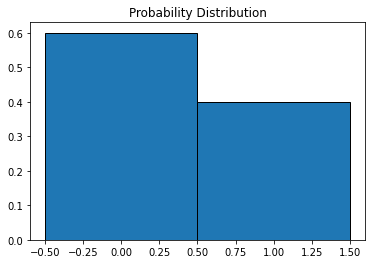

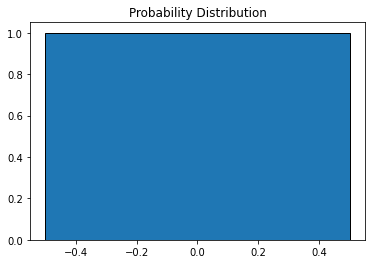

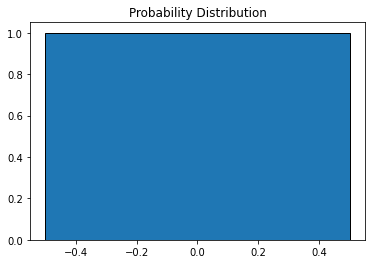

In [102]:
def show_distribution(outcomes, title='Probability Distribution'):
    num_trials = len(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    plt.title(title)
    return 

mine_1 = [Bernoulli_mine(1) for i in range(10)]
mine_3 = [Bernoulli_mine(3) for i in range(10)]
mine_6 = [Bernoulli_mine(6) for i in range(10)]

print(mine_1)
print(mine_3)
print(mine_6)

show_distribution(mine_1)
plt.show()
show_distribution(mine_3)
plt.show()
show_distribution(mine_6)
plt.show()

# README
For questions where you are asked to plot a histogram, unless otherwise specified, please submit 3 graphs corresponding to $\rho=1,3,6$. 
Failure to include graphs will result in a lower grade. 


# Question 1 c)
For this problem, lets assume that block $B_{j-1}$ has value `wubba lubba` (note the space) and block $B_j$ has value `dub dub`. Let $X$  be a random variable that takes on value 1 if we successfully found a nonce, and 0 otherwise  Write a function called $\texttt{bernoulli_hist}$($n$,$\rho$) that does the following:
 - Simulates the PMF of $X$ where the number of leading zeros needed for a success is $\rho$.
 - Plot a histogram of frequencies of success and failures. Scale the y-axis so that we see frequencies like we did in Lab 1. 
 - Under the assumption that each mine can be modeled by a Bernoulli random variable, plot the theoretical PMF on top of the histogram. Note that there are only two points to plot, so a good way to ensure both graphs are visible is to use a scatter plot for the theoretical PMF and use a different color. 
  -   To accomplish this, generate a random nonce and append it to $B_{j-1}||B_j$, hash it using $\SHA$ and count the number of leading zeros. If the number of leading zeros is greater than or equal to $\rho$, this is a success (1) and a failure otherwise (0). In order to get a good estimate for the PMF, repeat this process 10,000 times and plot the resulting histogram.  You might also find the show distribution function from lab 1 useful.
 

In [32]:
import string
import random
from bitstring import BitArray

# Hash Mine 
# HASH EXAMPLE
inp = "demo".encode("utf-8")
print(hashlib.sha256(inp).hexdigest())

def count_leading_zeros(bitstring):
    """Helper method to count the leading zeros in a bit string."""
    leading_zeros = 0
    
    # get the index of the first 1
    first_1 = bitstring.find("1")
    
    if(first_1 == -1):
        leading_zeros = 256  # if there is no 1 found, the string is all 0s
    else:
        leading_zeros = first_1  # otherwise, there are that many leading 0s
    
    return leading_zeros


def hash_mine(b_old, b_new, rho):
    
    # generate a random nonce of length 10
    r = "".join(random.choices(string.ascii_lowercase + string.digits, k = 10)) 
    
    # append it to the block and encode
    to_hash = (b_old + b_new + r).encode("utf-8")
    
    # hash using SHA256 and get the bit string
    hashed_hex = hashlib.sha256(to_hash).hexdigest()
    bits = BitArray(hex=hashed_hex).bin
        
    # count the leading zeroes: success if # of leading zeros >= rho, fail if not
    if count_leading_zeros(bits) >= rho:
        return (True, r)
    else:
        return (False, "")


hash_mine("wubba lubba", "dub dub", 3)


2a97516c354b68848cdbd8f54a226a0a55b21ed138e207ad6c5cbb9c00aa5aea


(False, '')

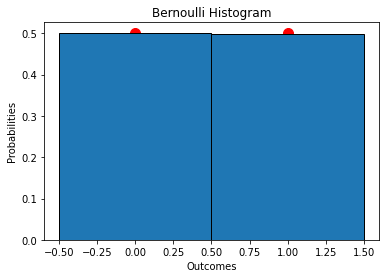

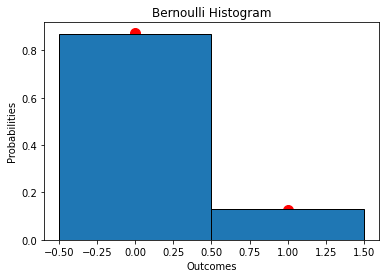

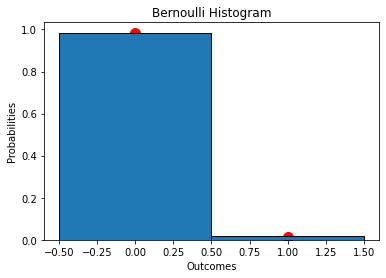

In [54]:
# Histogram 
def bernoulli_hist(b_old, b_new, rho, N=10000):
    results=[ hash_mine(b_old, b_new, rho)[0] for i in range(N) ]  # we only need the result
    p = 1.0 / (2.0 ** rho)
    show_distribution(results, "Bernoulli Histogram")
    plt.scatter([0, 1], [1.0-p,  p], c="r", marker='o' , s=100)
    plt.xlabel("Outcomes")
    plt.ylabel("Probabilities")
    plt.show()

bernoulli_hist('wubba lubba ', 'dub dub', 1)
bernoulli_hist('wubba lubba ', 'dub dub', 3)
bernoulli_hist('wubba lubba ', 'dub dub', 6)

# Geometric Distribution 

As I am sure many of you will recognize at this point, our current model is very limited. It is only capable of modeling 1 attempt at mining. In reality, we will likely have to try billions of nonces before we are ever successful. A natural way to extend this model is to allow for a sequence of mining attempts. In other words, we are moving away from a singular Bernoulli trial to *some* number of Bernoulli trials. How many you ask? In this section, lets assume we will continue to mine until we successfully find a verifying nonce.  We make the following assumptions: 

- $\rho$ stays constant during this series 
- As a result, the probability of success remains constant
- Each trial is independent. 
 
A good example to keep in mind is the experiment from Lab 1 of repeatedly flipping a $p$ biased coin until we observe a heads. This example gives us an (almost) complete description of the Geometric distribution. 

 Let $\{X_i\}$ be collection of independent trials of a Bernoulli experiment where $i$ is the trial number  and $p$ is the probability of success(written $X_i \sim Bernoulli(p)$). Let $$T=\min\{t: X_t=1\}$$
 In English, $T$ is the index where we first observe a success. From class, we have $$p_X(k)=\Pr[X_T=k]=p(1-p)^{k-1}\qquad \forall k\in \N $$
 $X$ has a geometric distribution, written $X\sim G(p)$.
As a remark, there is an equivalent definition that is defined in terms of the number of failures in the string. Notice that this definition has range $\{0,1,2,3...\}=\{0\} \cup \N$. We will use the convention that the first Bernoulli trial occurs at $t=1$ and $X$ takes on the index of the first success. 

# Problem 2
   For this problem, lets assume that block $B_{j-1}$ has value `wubba lubba` (note the space) and block $B_j$ has value `dub dub`. Complete the python function   `geometrix_hash_mine` that takes as input an integer $\rho$, the block $B=B_{j-1}||B_j$ and finds a nonce $r$ such that $\SHA(B_{j-1}||B_j||r)$ has at least   $\rho$ leading zeros. This function should return `num_trials`, $r$ where `num_trials` is the number of trials it took to successfully find a verifying nonce $r$.

In [45]:
def geometric_hash_mine(b_old, b_new, rho):
    
    trial = 0
    nonce_found = False
    
    while(nonce_found == False):
        # generate a random nonce of length 10
        r = "".join(random.choices(string.ascii_lowercase + string.digits, k = 10))
        
        # append it to the block and encode
        to_hash = (b_old + b_new + r).encode("utf-8")
        
        # hash using SHA256 and get the bit string
        hashed_hex = hashlib.sha256(to_hash).hexdigest()
        bits = BitArray(hex=hashed_hex).bin
    
        # count the leading zeroes: success if >= rho, fail if not        
        if count_leading_zeros(bits) >= rho:
            nonce_found = True
            return (trial, r)
        else:
            trial += 1
    
geometric_hash_mine("wubba lubba", "dub dub", 3)

(12, 'qbigw1af08')

 # Problem 2b
 Let $X$ be a random variable that denotes the first index at which a verifying nonce was found.  In this question you will be estimating the PMF of $X$. 
Write a function called`geometric_hist(b_old, b_new, rho)` that takes as input the number of leading zeroes $\rho$ and $B=B_{j-1}||B_j$ (old block and new block)and plots the histogram of 100,000 calls to `geometric_hash_mine`.  Note you only need the first element of the output for each call (IE don't plot the nonce, only the number of tries it took successfully find a verifying nonce). 
On top of the histogram, plot the actual PMF of $X$ based on $\rho$. 
Explain why the Geometric distribution is a good model for this experiment.

In [109]:
def geometric_hist(b_old, b_new, rho, N=10000):
    results=[ geometric_hash_mine(b_old, b_new, rho)[0] for i in range(N) ]    
    p = 1.0 / (2.0 ** rho)
    q = 1.0 - p
    show_distribution(results, "Geometric Histogram")
    
    #print(results)
    #c = Counter(results)
    #print(c[0])
    
    plt.scatter(results, [(q**(x))*p for x in results], c="r", marker='o' , s=100)
    plt.xlabel("Outcomes")
    plt.ylabel("Probabilities")
    plt.show()

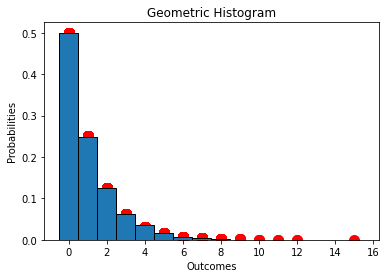

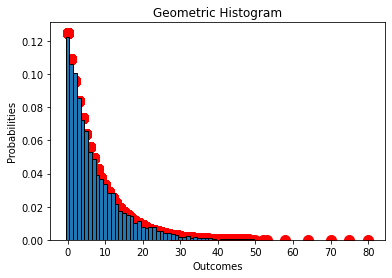

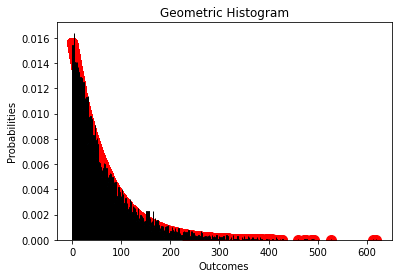

In [110]:
geometric_hist('wubba lubba ', 'dub dub', 1)
geometric_hist('wubba lubba ', 'dub dub', 3)
geometric_hist('wubba lubba ', 'dub dub', 6)

The Geometric distribution is a good model for this experiment because the aim is to count the number of trials before the first success, where a success is finding a verifying nonce. Further, each trial is iid Bernoulli and the probability of success is constant throughout the experiment, which means that the Geometric distribution is appropriate. 

# Binomial Distribution
Now suppose we conduct a finite sequence of independent  Bernoulli trials. Often, we are interested in counting the number of successes.  As a motivating example, suppose you flip 3 fair coins, and are interested in the probability that exactly one coin comes up heads. We first write down the space of possible outcomes where $T$ denotes tails and $H$ denotes heads.  $$\Omega=
\{ (HHH), (HHT), (HTH), (THH), (TTH),(THT), (HTT), (TTT)\}$$
We next identify the set $A$ of all trials with exactly one heads
$$A\subset \Omega=\{(TTH),(THT)(HTT)\}$$
In the case where the coin is fair, the probability that exactly one of the trials is heads is $$\frac{|A|}{|\Omega|}= \frac{3}{8}$$
A random variable $X$ that counts the number of successes in a sequence of independent Bernoulli trials with shared probability of success $p\in (0,1)$ is called a Binomial random variable written $X\sim B(n,p)$ where $n$ is the number of trials and $p$ is the probability of success.

In the case of the above example, the number of trials is 3, as we flip 3 coins and the probability of success is $p=\frac{1}{2}$ since the  coin is fair.

Generalizing this for $X\sim B(n,p)$, we are interested in $\Pr[X=k]$ which is the probability that in a string of $n$ Bernoulli trials, we get exactly $k$ successes. If we observed $k$ success, then that means there were $n-k$ failures as there were $n$ trials total. Now we note that there are exactly $\binom{n}{k}$ ways of having $k$ success and $n-k$ failures. Finally, since each trial is independent, we have
\begin{equation}
\Pr[B(n,p)=k]=\binom{n}{k}p^{k}(1-p)^{n-k} \qquad \forall k\in\{0,1,...,n\}\nonumber
\end{equation}
In English, suppose we flip a $p$ biased coin $n$ times. Then probability that exactly $k$ of these coins land heads up is exactly the PMF($k$) of $X\sim B(n,p)$.

# Question 3 a
Write a function called binomial\_mine($\rho,n$) that simulates $n$ attempts  at finding a verifying nonce $r$ according to a binomial model where the probability of mining a coin on any attempt is depends on $\rho$ (again, the number of leading zeros). This function should output the number of successes.  Use bernoulli\_mine($\rho$) as subroutine in your function. 

In [49]:
def binomial_mine(rho, n):
    """Concurrent Trials """
    outcomes = []
    
    for i in range(n):
        outcomes.append(Bernoulli_mine(rho))
        
    counter = Counter(outcomes)
    return counter[1]

binomial_mine(3, 10)

3

# Question 4)
Write a function `binom_hash_mine(b_old,b_new, rho, n)` which takes parameters $B=B_{j-1}||B_j$, $n$, $\rho$, and  returns the number of coins successfully mined in $n$ calls to $\texttt{hash\_mine}$

In [97]:
def binomial_hash_mine(b_old, b_new, rho, n):
    outcomes = []
    
    for i in range(n):
        outcomes.append(hash_mine(b_old, b_new, rho)[0])
        
    counter = Counter(outcomes)
    return counter[True]

binomial_hash_mine("wubba lubba ", "dub dub ", 3, 10)

2

# Question 5
Write a function called `binom_hist(b_old,b_new, rho, n)` which plots the result of 1,000 calls to `binom_hash_mine`. Scale the y-axis so we see probabilities. Plot the theoretical PMF of the Binomial distribution with parameters $n$ and $p$ where $p$ depends on $\rho$.  Explain why the Binomial distribution is a good model for this experiment. 

Notice that if we try to increase the number of data points from 10,000 to 100,000 this becomes incredibly slow. Further, we encounter overflow errors if we pick $n>100$. (Alternatively, you could use `from scipy.stats import binom` which computes the PMF in such a way that it doesn't overflow). 

In [100]:
def binom_coeff_helper(n, k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

def binomial_hist(b_old, b_new, rho, n, N=10000):
    results=[ binomial_hash_mine(b_old, b_new, rho, n) for i in range(N) ]
    p = 1.0 / (2.0 ** rho)
    q = 1.0 - p
    show_distribution(results, "Binomial Histogram")
    plt.scatter(results, [binom_coeff_helper(n, x)*(p**x)*(q**(n-x)) for x in results], 
                c="r", marker='o', s=100)
    plt.xlabel("Outcomes")
    plt.ylabel("Probabilities")
    plt.show()

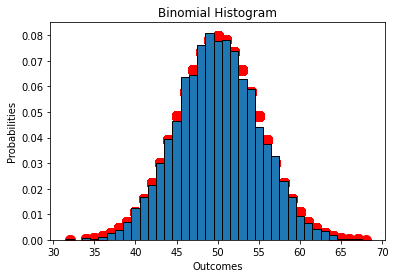

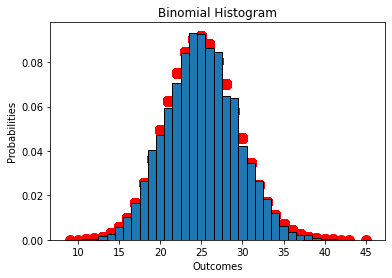

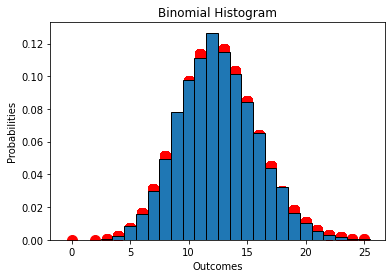

In [101]:
binomial_hist('wubba lubba ', 'dub dub', 1, 100)
binomial_hist('wubba lubba ', 'dub dub', 2, 100)
binomial_hist('wubba lubba ', 'dub dub', 3, 100)

The Binomial distribution is a good model for this experiment because the aim is to count the number of successes in N trials, where each trial is iid Bernoulli and the probability of a success is the same for each trial. 